In [1]:
  >>> import os
  >>> import numpy as np
  >>> import math
  >>> import matplotlib.pyplot as plt
  >>> from matplotlib.patches import Polygon
  >>> from pyradiosky import SkyModel
  >>> from pyradiosky.data import DATA_PATH
  >>> from astropy_healpix import HEALPix
  >>> from astropy.coordinates import SkyCoord
  >>> sm = SkyModel()


  >>> filename = os.path.join(DATA_PATH, "gsm_icrs.skyh5")
  >>> sm.read_skyh5(filename) 

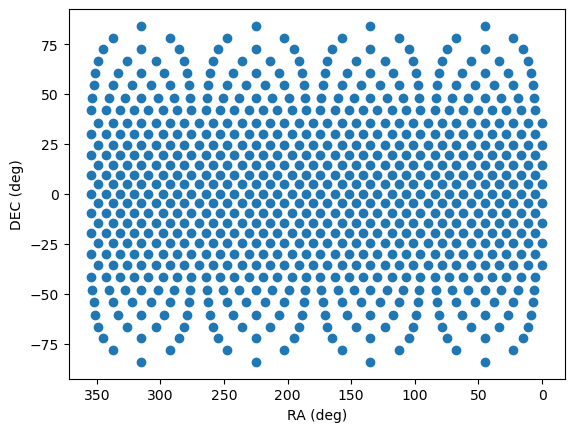

In [9]:
  >>> ra, dec = sm.get_lon_lat()
  >>> plt.scatter(ra, dec)
  >>> plt.xlim(max(ra.value), min(ra.value))
  >>> plt.autoscale()
  >>> plt.xlabel("RA (deg)")
  >>> plt.ylabel("DEC (deg)")
  >>> plt.show() # doctest: +SKIP


In [3]:
  >>> # a HEALPix map has Ncomponents = 12*nside^2, where components are pixels
  >>> print(sm.Ncomponents)
  # 768
  >>> print(sm.Nfreqs)
  # 10
  >>> print(sm.component_type)
  # healpix
  >>> print(sm.spectral_type)
  # full
  >>> print(sm.freq_array)
  # [5.00000000e+07 6.11111111e+07 7.22222222e+07 8.33333333e+07
  #  9.44444444e+07 1.05555556e+08 1.16666667e+08 1.27777778e+08
  #  1.38888889e+08 1.50000000e+08] Hz
  >>> print(sm.hpx_inds[:10])
  # [0 1 2 3 4 5 6 7 8 9]
  >>> print(sm.hpx_order)
  # ring
  >>> print(sm.nside)
  # 8
  >>> print(sm.frame)
  # icrs

768
10
healpix
full
[5.00000000e+07 6.11111111e+07 7.22222222e+07 8.33333333e+07
 9.44444444e+07 1.05555556e+08 1.16666667e+08 1.27777778e+08
 1.38888889e+08 1.50000000e+08] Hz
[0 1 2 3 4 5 6 7 8 9]
ring
8
icrs


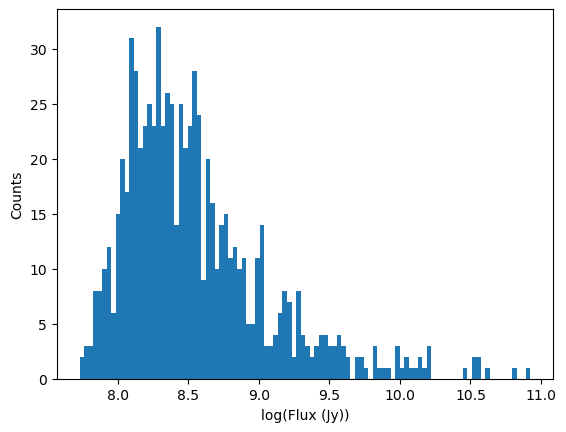

In [4]:
  >>> # Plot a histogram of the Stokes I fluxes
  >>> plt.hist(np.log(sm.stokes.value[0,0,:]), bins=100)
  >>> plt.xlabel("log(Flux (Jy))")
  >>> plt.ylabel("Counts")
  >>> plt.show() # doctest: +SKIP


In [5]:
  >>> # Use the astropy_healpix library to get some information about the map
  >>> hp = HEALPix(sm.nside, sm.hpx_order, sm.frame)
  >>> print(hp.pixel_area)
  # 0.016362461737446838 sr
  >>> print(hp.pixel_resolution)
  # 439.74226071262797 arcmin


0.016362461737446838 sr
439.74226071262797 arcmin


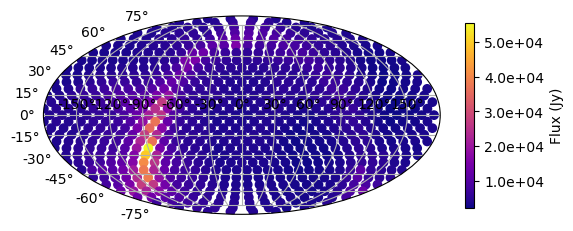

In [6]:
  >>> # Now plot the pixels on a Mollweide projection
  >>> ra, dec = sm.get_lon_lat()
  >>> plt.subplot(111, projection="mollweide")
  >>> plt.grid(True)
  >>> plt.scatter(ra.wrap_at('180d').radian, dec.radian, c=sm.stokes[0,0,:], cmap="plasma")
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.5, format="%4.1e")
  >>> plt.show() # doctest: +SKIP


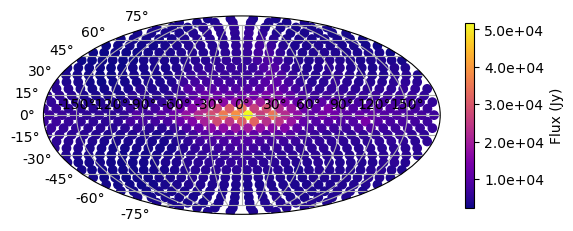

In [7]:
  >>> # It'd be nice to see this in a galactic frame.
  >>> # For `point` components, the frame can be changed by using the `transform_to`
  >>> # method, which just calls the astropy SkyCoord method of the same name.
  >>> # For Healpix maps, though, this isn't right because Healpix pixel locations
  >>> # are defined in the desired frame, so we actually need to interpolate to the new pixel locations.
  >>> sm_galactic = sm.healpix_interp_transform("galactic", inplace=False)

  >>> # Now plot the pixels on a Mollweide projection with flux shown in color
  >>> l, b = sm_galactic.get_lon_lat()
  >>> plt.subplot(111, projection="mollweide")
  >>> plt.grid(True)
  >>> plt.scatter(l.wrap_at('180d').radian, b.radian,c=sm_galactic.stokes[0,0,:],cmap="plasma")
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.5, format="%4.1e")
  >>> plt.show() # doctest: +SKIP


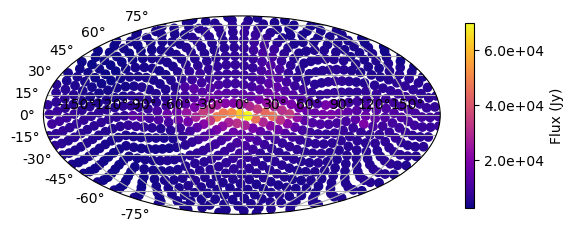

In [8]:
  >>> # We can compare this to converting each healpix pixel to a point sources and
  >>> # converting those sources to galactic coordinates (avoiding the interpolation)
  >>> sm_point = sm.copy()
  >>> sm_point.healpix_to_point()
  >>> sm_point.transform_to("galactic")
  >>> pt_l, pt_b = sm_point.get_lon_lat()
  >>> plt.subplot(111, projection="mollweide")
  >>> plt.grid(True)
  >>> plt.scatter(pt_l.wrap_at('180d').radian, pt_b.radian,c=sm_point.stokes[0,0,:],cmap="plasma")
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.5, format="%4.1e")
  >>> plt.show() # doctest: +SKIP
